In [142]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from model.Season import Season
from model.util import remove_mr_ms

In [143]:
with open('seasons.pickle') as f:
    seasons = pickle.load(f)
for year, season in seasons.iteritems():
    print year,
    season.load_scores()

2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017


In [144]:
men = pd.read_csv('pd_data/components_men.csv')
ladies = pd.read_csv('pd_data/components_ladies.csv')
pairs = pd.read_csv('pd_data/components_pairs.csv')
dance = pd.read_csv('pd_data/components_dance.csv')

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


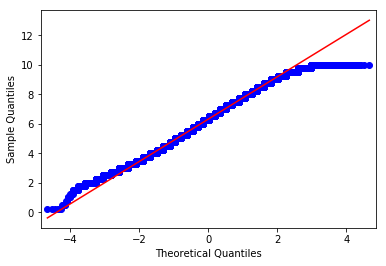

In [148]:
sm.qqplot(all_comps['Score'], line='s')
plt.show()

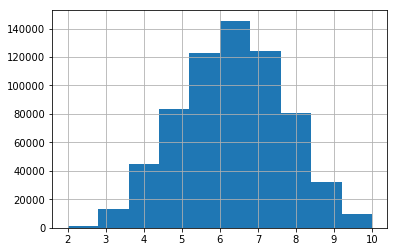

In [149]:
all_comps['Final Points'].hist()
plt.show()

In [54]:
np.mean(men[men['Component Name'] == 'Transitions'].Score)

6.1966623753697823

In [56]:
np.mean(men.Score)

6.4598731784814287

In [150]:
all_comps = pd.concat([men, ladies, pairs, dance])

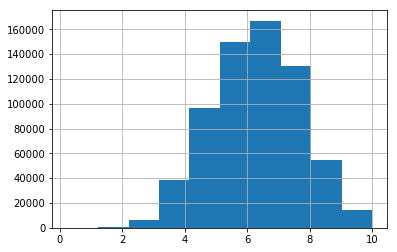

In [151]:
all_comps.Score.hist()
plt.show()

In [6]:
all_comps[all_comps.Season == 2017].Score.var()

1.6131237938037315

In [7]:
all_comps[all_comps.Season == 2016].Score.var()

1.7164260915588629

In [8]:
all_comps[all_comps.Season == 2015].Score.var()

1.4344274081092998

In [122]:
x = []
y = []
for year in xrange(2006, 2018):
    x.append(year)
    this_season = all_comps[all_comps.Season == year]
    y.append(len(this_season[this_season.Score == 10.00]))
    print year, this_season.Score.var(), len(this_season[this_season.Score == 10.00])

2006 1.56322431881 0
2007 1.58016026138 0
2008 1.88735155161 0
2009 1.78972986192 0
2010 1.98632056307 30
2011 1.55749546633 28
2012 1.79393199527 81
2013 1.70844704011 106
2014 1.74174435842 273
2015 1.43442740811 20
2016 1.71642609156 231
2017 1.6131237938 164


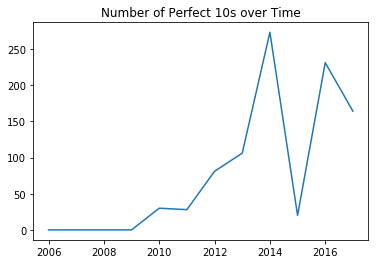

In [124]:
plt.plot(x,y)
plt.title('Number of Perfect 10s over Time')
plt.show()

In [17]:
perfect = all_comps[all_comps.Score == 10.00]

In [66]:
has_judges = all_comps[all_comps['Judge Nation'].notnull()]

In [69]:
has_judges[has_judges['Judge Nation'] != 'ISU'].Event.unique()

array(['gpusa2016', 'gpcan2016', 'gprus2016', 'gpfra2016', 'gpchn2016',
       'gpjpn2016', 'gpf1617'], dtype=object)

In [127]:
has_judges.columns

Index([u'Unnamed: 0', u'Base Value', u'Component Name', u'Dedutions',
       u'Discipline', u'Event', u'Factor', u'Final Points', u'Judge',
       u'Judge Nation', u'PCS', u'Score', u'Season', u'Segment',
       u'Segment Rank', u'Skater', u'Skater Nation', u'Start', u'TES',
       u'Judge Number', u'Nation Match', u'Point Difference', u'Intercept'],
      dtype='object')

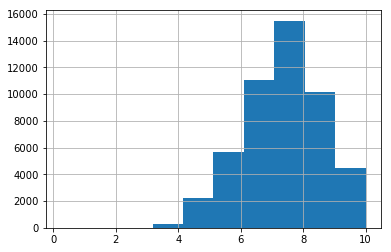

In [99]:
has_judges.Score.hist()
plt.show()

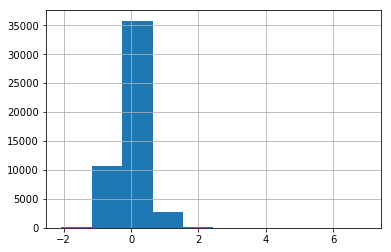

In [121]:
has_judges['Point Difference'].hist()
plt.show()

In [122]:
print has_judges['Point Difference'].var(), has_judges.Score.var()

0.151364221794 1.6131237938


In [155]:
has_judges.columns

Index([u'Unnamed: 0', u'Base Value', u'Component Name', u'Dedutions',
       u'Discipline', u'Event', u'Factor', u'Final Points', u'Judge',
       u'Judge Nation', u'PCS', u'Score', u'Season', u'Segment',
       u'Segment Rank', u'Skater', u'Skater Nation', u'Start', u'TES',
       u'Judge Number', u'Nation Match', u'Point Difference'],
      dtype='object')

In [95]:
def same_nation(row):
    return 1 if row['Judge Nation'] == row['Skater Nation'] else 0

In [96]:
has_judges['Nation Match'] = has_judges.apply(same_nation, axis=1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [106]:
has_judges['Point Difference'] = has_judges.apply(lambda row: row['Final Points'] - row['Score'], axis=1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [84]:
years = []
avg = []
var = []
for year in xrange(2006, 2018):
    years.append(year)
    avg.append(np.median(all_comps[all_comps.Season == year].Score))
    var.append(np.var(all_comps[all_comps.Season == year].Score))

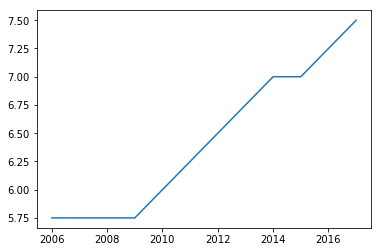

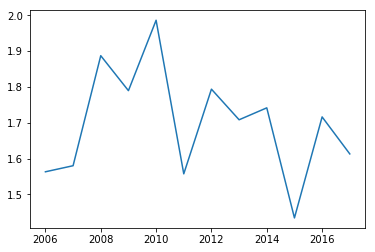

In [87]:
plt.plot(years, avg, label='median')
plt.show()
plt.plot(years, var, label='variance')
plt.show()

In [132]:
np.mean(has_judges[has_judges['Nation Match'] == 1]['Point Difference'])

-0.23236904761904759

In [138]:
with open('pd_data/name_fixes_judge.json') as f:
    judge_name_fixes = f.read()
judge_name_fixes = json.loads(judge_name_fixes)

In [ ]:
for wrong_name, right_name in judge_name_fixes.iteritems():
    has_judges.loc[has_judges.Judge == wrong_name, 'Judge'] = right_name

/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
len(has_judges.Judge.unique())

In [130]:
X = has_judges[['Nation Match']]
X = sm.add_constant(X)
y = has_judges['Point Difference']

In [131]:
mod = sm.OLS(y, X)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:       Point Difference   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1028.
Date:                Tue, 30 Jan 2018   Prob (F-statistic):          3.07e-223
Time:                        20:09:09   Log-Likelihood:                -22916.
No. Observations:               49325   AIC:                         4.584e+04
Df Residuals:                   49323   BIC:                         4.585e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            0.0201      0.002     11.291   

In [102]:
print lr.score(X, y)
print lr.coef_
print lr.intercept_

0.908104798546
[ 0.2545985  0.9950425]
0.0164792332928
